Se carga el catálogo de las enanas

Se analizan los datos del fichero del catálog

Se preparan los ficheros para descargar los espectros de SDSS

Se prepara el dataset con los espectros de las enanas

# Librerias

In [ ]:
 from astropy.io import fits

In [ ]:
%matplotlib inline


In [ ]:
import json

In [ ]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [ ]:
import numpy as np
import pandas as pd
import io

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from astropy.io import ascii
import os
import sys


In [ ]:
!pip install pyprind

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Montar google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Astrofisica/Espectros")
#/content/drive/My Drive/Visualizacion
os.getcwd()

'/content/drive/MyDrive/Astrofisica/Espectros'

#Inspeccionar fichero obtendido de vzier con el catálogo West et al.


In [ ]:
directorio = "./cata_west/"
#fichero = "asu_all_columns"
fichero = 'asu_binary'
hdul = fits.open(directorio+fichero+'.fit')

Desde local con notebook

In [ ]:
directorio = 'D:/Masteres/Master Big Data/TFM/Trabajo/Datos/catalogo West/'
#fichero = "asu_all_columns"
fichero = 'asu_binary'
hdul = fits.open(directorio+fichero+'.fit')

In [ ]:
hdul.info()

Filename: D:/Masteres/Master Big Data/TFM/Trabajo/Datos/catalogo West/asu_binary.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     129   ()      
  1  J_AJ_141_97_catalog    1 BinTableHDU    369   70840R x 73C   [I, J, I, K, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, I, B, D, D, D, E, D, D, D, E, D, D, D, E, D, D, D, E, D, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, B, B, 5A, 5A, 31A, J]   


In [ ]:
hdul[1].header

XTENSION= 'BINTABLE'           / Binary Table Extension                         
BITPIX  =                    8 / binary data                                    
NAXIS   =                    2 / Simple 2-D matrix                              
NAXIS1  =                  382 / Number of bytes per record                     
NAXIS2  =                70840 / Number of records                              
PCOUNT  =                    0 / Get rid of random parameters                   
GCOUNT  =                    1 / Only one group (isn't it obvious?)             
TFIELDS =                   73 / Number of data fields (columns)                
CDS-CAT = 'J/AJ/141/97'        / Catalogue designation in CDS nomenclature      
         SDSS DR7 M dwarfs (West+, 2011)                                        
EXTNAME = 'J_AJ_141_97_catalog' / Identification of the table                   
CDS-NAME= 'J/AJ/141/97/catalog' / Table name in METAtab                         
         The catalog of spec

In [ ]:
data=hdul[1].data #datos con espectro del catálogo West

In [ ]:
data

FITS_rec([(2212, 53789, 356, 587741602561261734, 165.28854, 26.53598, 23.849, 0.65 , 20.939, 0.039, 19.328, 0.029, 17.839, 0.014, 17.038, 0.015, 0.106, 0.078, 0.057, 0.043, 0.03 , 53360.4228,  18, 5,  1.097, 0.225,  8.85,  4.03,  3.153,  2.013,  1.9 ,  3.39, -3.114,  4.425, 0.85, 1.24,  0.74 ,   4.405,  0.85, 3.91,   0.551,  7.715,  0.32, 5.8 , 0.405, 0.025, 0.8  , 0.036, 0.372, 0.017, 0.628, 0.026, 0.804, 0.054, 0.567, 0.037, 0.643, 0.033, 0.695, 0.041, 0.366, 0.019, 0.883, 0.022, 0.394, 0.899,  0.048, 0, 1, 'SDSS7', 'Sloan', 'SDSS J110109.24+263209.5',     1),
          (2212, 53789, 489, 587741602561851642, 166.71916, 26.91319, 24.14 , 0.698, 22.027, 0.068, 20.747, 0.037, 18.714, 0.019, 17.565, 0.026, 0.107, 0.079, 0.057, 0.043, 0.031, 53360.4266, -33, 7,  4.027, 0.894,  4.98,  6.1 ,  7.137,  8.095,  0.92,  1.41,  5.989,  6.849, 1.  , 3.46,  2.7  ,   4.689,  0.8 , 2.25,  -2.327, 11.602,  0.32, 1.72, 0.305, 0.042, 0.799, 0.094, 0.227, 0.018, 0.534, 0.027, 0.798, 0.163, 0.467, 0.048, 

In [ ]:
data.shape

(70840,)

#Creación fichero csv con la información del catálogo

In [ ]:
df_catalogo_em_west =pd.DataFrame(columns=data.dtype.names)

In [ ]:
df_catalogo_em_west


,Plate,MJD,Fiber,ObjID,RAJ2000,DEJ2000,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Au,Ag,Ar,Ai,Az,MJDr,RV,SpT,W_Ha_,e_W_Ha_,HaS_N,Ha_c,W_Hb_,e_W_Hb_,HbS_N,Hb_c,W_Hg_,e_W_Hg_,HgS_N,Hg_c,W_Hd_,e_W_Hd_,HdS_N,Hd_c,W_Ca_,e_W_Ca_,CaS_N,CA_c,TiO5,e_TiO5,CaH1,e_CaH1,CaH2,e_CaH2,CaH3,e_CaH3,TiO1,e_TiO1,TiO2,e_TiO2,TiO3,e_TiO3,TiO4,e_TiO4,TiO5R,e_TiO5R,TiO8,e_TiO8,CaOH,zeta,e_zeta,WDM,pmOK,SDSS7,Sloan,SimbadName,recno


In [ ]:
!pip install pyprind

Seleccionamos los espectros a cargar del catálogo con n_inicio y n_cargar

In [ ]:
n_inicio=10000
n_cargar = 5000

import pyprind
pbar = pyprind.ProgBar(n_cargar)

for i in data[n_inicio:n_cargar+n_inicio]:
  data_temp = np.asarray(list(i))
  df_temp = pd.DataFrame(data=data_temp.reshape(1,-1), columns=data.dtype.names)
  df_catalogo_em_west =pd.concat([df_catalogo_em_west, df_temp], ignore_index=True)
  pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:59


In [ ]:
df_catalogo_em_west.head(3)

,Plate,MJD,Fiber,ObjID,RAJ2000,DEJ2000,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Au,Ag,Ar,Ai,Az,MJDr,RV,SpT,W_Ha_,e_W_Ha_,HaS_N,Ha_c,W_Hb_,e_W_Hb_,HbS_N,Hb_c,W_Hg_,e_W_Hg_,HgS_N,Hg_c,W_Hd_,e_W_Hd_,HdS_N,Hd_c,W_Ca_,e_W_Ca_,CaS_N,CA_c,TiO5,e_TiO5,CaH1,e_CaH1,CaH2,e_CaH2,CaH3,e_CaH3,TiO1,e_TiO1,TiO2,e_TiO2,TiO3,e_TiO3,TiO4,e_TiO4,TiO5R,e_TiO5R,TiO8,e_TiO8,CaOH,zeta,e_zeta,WDM,pmOK,SDSS7,Sloan,SimbadName,recno
0,1995,53415,383,587738948293558298,182.28578999999996,40.78715999999999,24.504,0.756,23.574,0.38,20.959,0.058,19.392,0.037,18.178,0.024,0.094,0.069,0.05,0.038,0.027,53052.4317,79,5,5.611,1.408,4.36,4.96,2.302,2.441,1.59,5.78,4.379,7.662,0.72,4.46,6.001,27.771,0.24,4.95,-3.519,5.13,0.97,3.68,0.214,0.053,0.806,0.114,0.352,0.04,0.597,0.056,1.099,0.22,0.443,0.078,0.704,0.108,0.374,0.094,0.268,0.044,0.964,0.065,0.688,1.124,0.109,0,0,SDSS7,Sloan,SDSS J120908.59+404713.7,10001
1,2653,54230,629,587742014902370583,204.27779999999998,22.187409999999996,24.448,0.654,22.213,0.077,20.642,0.031,18.422,0.018,17.257,0.025,0.063,0.046,0.034,0.025,0.018,53439.4139,4,7,10.293,1.315,8.2,16.73,23.973,43.598,0.55,3.79,-91.979,1057.201,-0.09,4.54,467.022,23610.504,0.02,3.82,-10.776,6.63,2.23,17.86,0.198,0.035,0.787,0.089,0.312,0.023,0.577,0.032,0.842,0.119,0.389,0.055,0.595,0.053,0.405,0.073,0.224,0.025,0.775,0.027,0.6,1.083,0.061,0,0,SDSS7,Sloan,SDSS J133706.67+221114.6,10002
2,2654,54231,457,587742014902763709,205.29068999999998,21.917589999999997,22.357,0.199,20.188,0.028,18.551,0.017,17.271,0.014,16.595,0.016,0.075,0.055,0.04,0.03,0.021,53439.4164,-33,4,0.428,0.115,23.36,3.51,-0.732,0.474,5.29,1.67,-1.481,1.305,2.17,2.28,-2.918,2.411,1.83,3.93,4.575,14.93,0.33,1.91,0.503,0.017,0.743,0.021,0.448,0.011,0.687,0.015,0.787,0.032,0.647,0.025,0.75,0.027,0.679,0.024,0.482,0.014,0.929,0.019,0.483,0.886,0.038,0,1,SDSS7,Sloan,SDSS J134109.76+215503.3,10003


Cambiamos el nombre de algunas columnas

In [ ]:
new_columnas = {'Plate':'PLATE', 'Fiber': 'FIBER'}
df_catalogo_em_west.rename(columns=new_columnas,inplace=True)
df_catalogo_em_west.head(1)

,PLATE,MJD,FIBER,ObjID,RAJ2000,DEJ2000,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Au,Ag,Ar,Ai,Az,MJDr,RV,SpT,W_Ha_,e_W_Ha_,HaS_N,Ha_c,W_Hb_,e_W_Hb_,HbS_N,Hb_c,W_Hg_,e_W_Hg_,HgS_N,Hg_c,W_Hd_,e_W_Hd_,HdS_N,Hd_c,W_Ca_,e_W_Ca_,CaS_N,CA_c,TiO5,e_TiO5,CaH1,e_CaH1,CaH2,e_CaH2,CaH3,e_CaH3,TiO1,e_TiO1,TiO2,e_TiO2,TiO3,e_TiO3,TiO4,e_TiO4,TiO5R,e_TiO5R,TiO8,e_TiO8,CaOH,zeta,e_zeta,WDM,pmOK,SDSS7,Sloan,SimbadName,recno
0,1995,53415,383,587738948293558298,182.28578999999996,40.78715999999999,24.504,0.756,23.574,0.38,20.959,0.058,19.392,0.037,18.178,0.024,0.094,0.069,0.05,0.038,0.027,53052.4317,79,5,5.611,1.408,4.36,4.96,2.302,2.441,1.59,5.78,4.379,7.662,0.72,4.46,6.001,27.771,0.24,4.95,-3.519,5.13,0.97,3.68,0.214,0.053,0.806,0.114,0.352,0.04,0.597,0.056,1.099,0.22,0.443,0.078,0.704,0.108,0.374,0.094,0.268,0.044,0.964,0.065,0.688,1.124,0.109,0,0,SDSS7,Sloan,SDSS J120908.59+404713.7,10001


## Guardar/recuperar fichero

In [ ]:
directorio = "./cata_west/"
#fichero = 'muestra_catalago_west.csv'
fichero = 'muestra_catalago_west_2.csv'
df_catalogo_em_west.to_csv(directorio+fichero, index=False, encoding= 'utf-8')

In [ ]:
directorio = "./cata_west/"
#fichero = 'muestra_catalago_west.csv'
fichero = 'muestra_catalago_west_2.csv'
df_catalogo_em_west = pd.read_csv(directorio+fichero, index_col= False, encoding='utf-8')
df_catalogo_em_west

,PLATE,MJD,FIBER,ObjID,RAJ2000,DEJ2000,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Au,Ag,Ar,Ai,Az,MJDr,RV,SpT,W_Ha_,e_W_Ha_,HaS_N,Ha_c,W_Hb_,e_W_Hb_,HbS_N,Hb_c,W_Hg_,e_W_Hg_,HgS_N,Hg_c,W_Hd_,e_W_Hd_,HdS_N,Hd_c,W_Ca_,e_W_Ca_,CaS_N,CA_c,TiO5,e_TiO5,CaH1,e_CaH1,CaH2,e_CaH2,CaH3,e_CaH3,TiO1,e_TiO1,TiO2,e_TiO2,TiO3,e_TiO3,TiO4,e_TiO4,TiO5R,e_TiO5R,TiO8,e_TiO8,CaOH,zeta,e_zeta,WDM,pmOK,SDSS7,Sloan,SimbadName,recno
0,1995,53415,383,587738948293558298,182.28579,40.78716,24.504,0.756,23.574,0.380,20.959,0.058,19.392,0.037,18.178,0.024,0.094,0.069,0.050,0.038,0.027,53052.4317,79,5,5.611,1.408,4.36,4.96,2.302,2.441,1.59,5.78,4.379,7.662,0.72,4.46,6.001,27.771,0.24,4.95,-3.519,5.130,0.97,3.68,0.214,0.053,0.806,0.114,0.352,0.040,0.597,0.056,1.099,0.220,0.443,0.078,0.704,0.108,0.374,0.094,0.268,0.044,0.964,0.065,0.688,1.124,0.109,0,0,SDSS7,Sloan,SDSS J120908.59+404713.7,10001
1,2653,54230,629,587742014902370583,204.27780,22.18741,24.448,0.654,22.213,0.077,20.642,0.031,18.422,0.018,17.257,0.025,0.063,0.046,0.034,0.025,0.018,53439.4139,4,7,10.293,1.315,8.20,16.73,23.973,43.598,0.55,3.79,-91.979,1057.201,-0.09,4.54,467.022,23610.504,0.02,3.82,-10.776,6.630,2.23,17.86,0.198,0.035,0.787,0.089,0.312,0.023,0.577,0.032,0.842,0.119,0.389,0.055,0.595,0.053,0.405,0.073,0.224,0.025,0.775,0.027,0.600,1.083,0.061,0,0,SDSS7,Sloan,SDSS J133706.67+221114.6,10002
2,2654,54231,457,587742014902763709,205.29069,21.91759,22.357,0.199,20.188,0.028,18.551,0.017,17.271,0.014,16.595,0.016,0.075,0.055,0.040,0.030,0.021,53439.4164,-33,4,0.428,0.115,23.36,3.51,-0.732,0.474,5.29,1.67,-1.481,1.305,2.17,2.28,-2.918,2.411,1.83,3.93,4.575,14.930,0.33,1.91,0.503,0.017,0.743,0.021,0.448,0.011,0.687,0.015,0.787,0.032,0.647,0.025,0.750,0.027,0.679,0.024,0.482,0.014,0.929,0.019,0.483,0.886,0.038,0,1,SDSS7,Sloan,SDSS J134109.76+215503.3,10003
3,2654,54231,625,587742014903287840,206.55795,21.74227,19.458,0.029,17.951,0.014,16.859,0.019,15.843,0.016,15.326,0.014,0.111,0.082,0.059,0.045,0.032,53439.4197,-89,2,1.722,0.095,26.31,8.88,1.281,0.147,14.93,8.37,1.146,0.217,11.16,6.51,-0.542,0.223,8.49,4.44,1.397,0.432,5.95,5.39,0.558,0.010,0.803,0.010,0.549,0.007,0.790,0.011,0.812,0.016,0.739,0.016,0.785,0.015,0.737,0.014,0.550,0.009,0.960,0.010,0.555,1.103,0.038,1,0,SDSS7,Sloan,SDSS J134613.90+214432.1,10004
4,2518,54243,14,587742014916591896,237.74581,14.87625,21.974,0.194,19.633,0.052,17.637,0.018,16.759,0.018,16.306,0.019,0.230,0.169,0.123,0.093,0.066,53439.5039,-16,2,-0.372,0.088,13.76,1.32,0.024,0.277,6.58,1.62,0.138,0.685,3.22,3.86,-1.040,1.353,1.78,3.24,-1.027,3.771,0.76,2.68,0.691,0.019,0.831,0.016,0.632,0.012,0.826,0.016,0.867,0.026,0.862,0.028,0.837,0.023,0.838,0.024,0.667,0.016,0.980,0.017,0.624,1.011,0.081,0,1,SDSS7,Sloan,SDSS J155058.99+145234.5,10005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1661,53240,186,758874337171145589,303.22129,76.93604,21.949,0.572,21.123,0.079,19.891,0.040,19.319,0.033,18.998,0.073,0.856,0.629,0.457,0.346,0.245,52910.1858,-118,1,-0.790,0.557,4.72,2.20,-3.181,2.659,1.70,4.63,100.988,2003.648,0.05,2.40,-33.411,279.353,-0.12,3.21,-3.097,10.799,-0.31,1.47,0.997,0.128,0.938,0.080,0.903,0.101,1.005,0.110,0.876,0.090,1.090,0.173,0.870,0.100,0.866,0.088,1.048,0.121,1.073,0.172,1.018,-0.112,5.179,0,1,SDSS7,Sloan,SDSS J201253.10+765609.7,14996
4996,1661,53240,191,758874294224421346,302.98531,77.03996,21.734,0.307,19.829,0.025,18.641,0.015,18.238,0.014,18.088,0.032,0.788,0.580,0.421,0.319,0.226,52909.1253,-43,0,-1.100,0.203,20.67,9.25,-1.572,0.540,5.61,3.17,-0.062,1.072,2.09,2.62,0.817,3.276,0.80,3.41,-11.527,15.955,-0.77,8.29,0.922,0.049,0.955,0.030,0.908,0.041,0.941,0.042,1.031,0.044,0.905,0.050,0.919,0.041,0.944,0.041,0.957,0.040,1.091,0.074,0.960,5.484,15.761,0,1,SDSS7,Sloan,SDSS J20115

In [ ]:
test.shape

(5000, 73)

# Creación de los ficheros para cargar la información de SDSS. 



En esta sección crearemos los ficheros que subiremos a 
https://dr16.sdss.org/optical/spectrum/search o https://dr12.sdss.org/bulkSpectra/plateMJDFiberFile  para descargar los enlaces de los espectros. El tamaños máximo es de 1000, luego crearemos 4 ficheros. Una vez obtenidos los enlaces los descargaremos usando el comando **wget**. https://www.sdss.org/dr12/data_access/bulk/. La descaga se ha hecho del release 16.

Aparte de los fichero con los enclaces  también descargaremos en formato csv la información relativa a la clase. 

Los ficheros que subiremos a SDSS contendrán la siguiente información'PLATE', 'MJD', 'FIBER' separado por comas.

In [ ]:
plate_mjd_fiber = df_catalogo_em_west[['PLATE', 'MJD', 'FIBER']].values

In [ ]:
n_particiones = 5
tamano = int(plate_mjd_fiber.shape[0]/n_particiones)
#fichero = "west_catalog_plate_mjd_fiber_2"
fichero = "west_catalog_plate_mjd_fiber_2_"
i=1
for k in np.arange(0,tamano*(n_particiones-1),tamano):
  nom_fichero = fichero+str(i)+'.txt'
  inicio, final = k , k+tamano
  np.savetxt(nom_fichero, plate_mjd_fiber[inicio:final], fmt='%i', delimiter=',')
  print(f"iteracion {i} {nom_fichero} numero de registro inicial {inicio} numero de registro final {final-1} ")
  i+=1
inicio, final = final, plate_mjd_fiber.shape[0]
nom_fichero = fichero+str(i)+'.txt'
np.savetxt(nom_fichero, plate_mjd_fiber[inicio:final], fmt='%i', delimiter=',')
print(f"iteracion {i} {nom_fichero} numero de registro inicial {inicio} numero de registro final {final-1} ")


iteracion 1 west_catalog_plate_mjd_fiber_2_1.txt numero de registro inicial 0 numero de registro final 999 
iteracion 2 west_catalog_plate_mjd_fiber_2_2.txt numero de registro inicial 1000 numero de registro final 1999 
iteracion 3 west_catalog_plate_mjd_fiber_2_3.txt numero de registro inicial 2000 numero de registro final 2999 
iteracion 4 west_catalog_plate_mjd_fiber_2_4.txt numero de registro inicial 3000 numero de registro final 3999 
iteracion 5 west_catalog_plate_mjd_fiber_2_5.txt numero de registro inicial 4000 numero de registro final 4999 


En vez de usar la interfase de SDSS pòdemos crear directamente el fichero de descarga txt y usar wget desde linux usando ese fichero.
*wget fichero.txt*

In [ ]:
plate_mjd_fiber

array([[ 1995, 53415,   383],
       [ 2653, 54230,   629],
       [ 2654, 54231,   457],
       ...,
       [ 1661, 53240,   192],
       [ 1661, 53240,   194],
       [ 1661, 53240,   199]])

In [ ]:
cabecera = 'https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite/' #0395/spec-0395-51783-0418.fits
ficheros_espectros = []
for espectro in plate_mjd_fiber:
  placa = str(espectro[0]).zfill(4); mjd = str(espectro[1]).zfill(5)
  fiber = str(espectro[2]).zfill(4)
  ficheros_espectros.append(cabecera+placa+'/'+'spec-'+placa+'-'+mjd+'-'+fiber+'.fits\n')
ficheros_espectros = np.asarray(ficheros_espectros)

In [ ]:
ficheros_espectros.shape

(5000,)

In [ ]:
np.savetxt('download_west_2.txt', ficheros_espectros,fmt='%s')

# Revisión de los datos contenidos en los ficheros descargados de SDSS

Un ejemplo de un fichero descagado de una enana marrón es *spec-0266-51602-0065.fits*. Vemos que el formato es spec-plate-MJD-fiber.fits. plate está formado por cuatro dígitos indicando la placa, MJD consta de 5 dígitos y fiber de 4. 

## Revisión a la estructura del archivo fits con los espectros. 

Una vez que tenemos los fits con los espectrosque hemos descagados de SDSS podemos crear el dataset

Abrimos un fichero cualquiera con la información espectroscópica.

In [ ]:
#fichero = './cata_west/espectros/spec-2974-54592-0571.fits'
fichero = "D:\Masteres\Master Big Data\TFM\Trabajo\Datos\espectros_enanas_marrones_2\spec-0299-51671-0244.fits"


In [ ]:
 hdul = fits.open(fichero)

In [ ]:
hdul.info()


Filename: D:\Masteres\Master Big Data\TFM\Trabajo\Datos\espectros_enanas_marrones_2\spec-0299-51671-0244.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     141   ()      
  1  COADD         1 BinTableHDU     26   3830R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


Vemos que tenemos 4 HDU o Header Data Unit.

Podemos revisar los metadatos. El espectro parece estar en COADD

http://classic.sdss.org/dr7/products/spectra/read_spSpec.html

http://classic.sdss.org/dr7/dm/flatFiles/spSpec.html

In [ ]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4716721665.26 / 1st row Number of seconds since Nov 17 1858    
RA      =            260.55524 / 1st row RA of telescope boresight (deg)        
DEC     =            31.119024 / 1st row Dec of telescope boresight (degrees)   
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '08:56:36.63'        / 1st row TAI time HH:MM:SS.SS                   
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                54592 / MJD of observation                             
MJDLIST = '54591 54592'     

In [ ]:
#NO HAY DATOS
hdul[0].data

En principio no parece que nos interese esta información. Es información de la placa. 

In [ ]:
metadatos = hdul[1].header
metadatos

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3830 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

Vemos que tenemos el logaritmo de la frecuencia y que viene en Armstrong. TTYPE2  = 'loglam'

In [ ]:
data=hdul[1].data #datos con espectro proveniente de SDSS
data

FITS_rec([(1.5448196 , 3.5813, 0.36817232, 0, 0, 1.1022366 , 6.7276373, 0.7443351 ),
          (1.0405053 , 3.5814, 0.39408025, 0, 0, 1.102923  , 6.9529424, 0.68397146),
          (0.90776634, 3.5815, 0.40305337, 0, 0, 1.1009514 , 7.1035304, 0.65099704),
          ...,
          (8.010081  , 3.964 , 1.2070081 , 0, 0, 0.6800331 , 2.7521849, 6.081541  ),
          (7.8941984 , 3.9641, 1.072819  , 0, 0, 0.68041766, 2.888322 , 7.597902  ),
          (8.323593  , 3.9642, 0.9037333 , 0, 0, 0.6807003 , 3.2072837, 1.7384626 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

Aqui tenemos los espectros.

En SPECOBJ tenemos

In [ ]:
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1068 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  126 / number of table fields                         
TTYPE1  = 'SURVEY  '                                                            
TFORM1  = '6A      '                                                            
TTYPE2  = 'INSTRUMENT'                                                          
TFORM2  = '4A      '                                                            
TTYPE3  = 'CHUNK   '        

In [ ]:
info = hdul[2].data
info

FITS_rec([('sdss', 'SDSS', 'chunk192', 'legacy', 'dr2008.04.5', 'good', 27.6975, 0., 5000., -1, 0., -9999., -1, 1, 1, 0, 0, 0, 0, 0, '   3348583355275831296', '1237671936046006363', '1237671936046006363', '     11285462517678179', '3348426399990966272', 1, 'dr7', '26', '', -1, -0.13572751, -0.84450851, 0.51805736, 58.42768, 18.17363, 'QSO', 'SCIENCE', 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2974, 1937, 54592, 571, [6161,   40,    4,  126,   99], 260.86963, 31.202033, 'STAR', 'M0', -0.00011457, 1.7636925e-05, 1.0014082, 3697, 0.688733, 'spEigenStar-54474.fits', [26, -1, -1, -1, -1, -1, -1, -1, -1, -1], 4, [ 4.2624893 ,  0.3031604 ,  0.27080676, -0.44360742, -1.0334725 ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ], 0., 0., 0., 0., 0., 0., 0, 3813.2915, 9208.735, 0.3702, 0, 7.811943, [ 0.43104646,  4.078941  , 10.280246  , 14.887928  ,  8.59176   ], 0.9671741, [3.0659103e-01, 4.5921125e-02, 3.5116153e-03, 1.0804971e-03, 5.4024853e-04, 2.7012426e-04, 0.00000

Para ver los datos con más claridad creamos un DataFrame

In [ ]:
df_info= pd.DataFrame(data=np.asarray(list(info),dtype=object).reshape(1,-1), columns=info.dtype.names)


In [ ]:
pd.set_option('display.max_columns', 200)

In [ ]:
df_info

,SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,PLATESN2,DEREDSN2,LAMBDA_EFF,BLUEFIBER,ZOFFSET,SNTURNOFF,NTURNOFF,SPECPRIMARY,SPECLEGACY,SPECSEGUE,SPECSEGUE1,SPECSEGUE2,SPECBOSS,BOSS_SPECOBJ_ID,SPECOBJID,FLUXOBJID,BESTOBJID,TARGETOBJID,PLATEID,NSPECOBS,FIRSTRELEASE,RUN2D,RUN1D,DESIGNID,CX,CY,CZ,XFOCAL,YFOCAL,SOURCETYPE,TARGETTYPE,PRIMTARGET,SECTARGET,LEGACY_TARGET1,...,FRACNSIGMA,FRACNSIGHI,FRACNSIGLO,SPECTROFLUX,SPECTROFLUX_IVAR,SPECTROSYNFLUX,SPECTROSYNFLUX_IVAR,SPECTROSKYFLUX,ANYANDMASK,ANYORMASK,SPEC1_G,SPEC1_R,SPEC1_I,SPEC2_G,SPEC2_R,SPEC2_I,ELODIE_FILENAME,ELODIE_OBJECT,ELODIE_SPTYPE,ELODIE_BV,ELODIE_TEFF,ELODIE_LOGG,ELODIE_FEH,ELODIE_Z,ELODIE_Z_ERR,ELODIE_Z_MODELERR,ELODIE_RCHI2,ELODIE_DOF,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON,COMMENTS_PERSON,CALIBFLUX,CALIBFLUX_IVAR
0,sdss,SDSS,chunk192,legacy,dr2008.04.5,good,27.6975,0,5000,-1,0,-9999,-1,1,1,0,0,0,0,0,3348583355275831296,1237671936046006363,1237671936046006363,11285462517678179,3348426399990966272,1,dr7,26,,-1,-0.135728,-0.844509,0.518057,58.4277,18.1736,QSO,SCIENCE,1,0,1,...,"[0.30659103, 0.045921125, 0.0035116153, 0.0010...","[0.14802809, 0.02350081, 0.0024311184, 0.00081...","[0.15856294, 0.022420313, 0.001080497, 0.00027...","[0.9317443, 5.0594344, 17.879364, 33.86805, 46...","[1.6963832, 4.958444, 3.136797, 1.4553112, 0.5...","[1.0031598, 4.9995403, 17.942856, 33.886887, 4...","[4.3332973, 4.86532, 3.30474, 1.41023, 0.60969...","[7.550456, 9.965682, 24.690512, 49.492126, 102...",159383552,262078464,27.9011,28.6355,27.6975,34.9355,38.1315,33.9315,RAC/L/00372.fits,HD079210,M0V,1.41,3858,4.165,-0.06,-0.000143438,1.76126e-05,5.26129e-06,0.950166,2138,0,0,0,,,0,0,0,0,,"[0.23924002, 3.2047281, 16.192097, 33.056606, ...","[77.815384, 22.80322, 7.010545, 2.039793, 0.37..."


In [ ]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 126 entries, SURVEY to CALIBFLUX_IVAR
dtypes: object(126)
memory usage: 1.1+ KB


Vemos que tenemos Z, la clase y la subclase. 

In [ ]:
df_info[['CLASS','SUBCLASS','Z','Z_ERR']]

,CLASS,SUBCLASS,Z
0,STAR,M0,-0.000114572


In [ ]:
# Este campo nos da información de los flujos calibrados para cada banda
len(df_info['CALIBFLUX'][0])

5

Contiene información para la reducción del espectro. Contains the entries from the plPlugMapM file used for the Spectro-2D reduction. 

http://classic.sdss.org/dr6/dm/flatFiles/spPlate.html

De aquí interesa la calidad de la placa **PLATEQUALITY** si queremos descartar placar con mala calidad. También nos interesa **PLATE, MJD, FIBER, CLASS,	SUBCLASS,	Z y Z_ERR** y de momento **SPECOBJID**, **FLUXOBJID**, **BESTOBJID** y 	**TARGETOBJID**. 

In [ ]:
hdul[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   89 / length of dimension 1                          
NAXIS2  =                   29 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   19 / number of table fields                         
TTYPE1  = 'PLATE   '                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'MJD     '                                                            
TFORM2  = 'J       '                                                            
TTYPE3  = 'FIBERID '        

In [ ]:
info = hdul[3].data
info

FITS_rec([(2974, 54592, 571, 'Ly_alpha', 1215.67      , 0.        , -1.0000000e+00,  0.      , -1.        ,  0.        , -1.       ,  0.        , -1.        , 0.        , -1.        , 0, 0, 0.       , -1.       ),
          (2974, 54592, 571, 'N_V 1240', 1240.81      , 0.        , -1.0000000e+00,  0.      , -1.        ,  0.        , -1.       ,  0.        , -1.        , 0.        , -1.        , 0, 0, 0.       , -1.       ),
          (2974, 54592, 571, 'C_IV 1549', 1549.48      , 0.        , -1.0000000e+00,  0.      , -1.        ,  0.        , -1.       ,  0.        , -1.        , 0.        , -1.        , 0, 0, 0.       , -1.       ),
          (2974, 54592, 571, 'He_II 1640', 1640.42      , 0.        , -1.0000000e+00,  0.      , -1.        ,  0.        , -1.       ,  0.        , -1.        , 0.        , -1.        , 0, 0, 0.       , -1.       ),
          (2974, 54592, 571, 'C_III] 1908', 1908.734     , 0.        , -1.0000000e+00,  0.      , -1.        ,  0.        , -1.       ,  0.  

In [ ]:
df_info =pd.DataFrame(columns=info.dtype.names)

In [ ]:
for i in info:
  data_temp = np.asarray(list(i))
  df_temp = pd.DataFrame(data=data_temp.reshape(1,-1), columns=info.dtype.names)
  df_info =pd.concat([df_info, df_temp], ignore_index=True)

In [ ]:
df_info.head(6)

,PLATE,MJD,FIBERID,LINENAME,LINEWAVE,LINEZ,LINEZ_ERR,LINESIGMA,LINESIGMA_ERR,LINEAREA,LINEAREA_ERR,LINEEW,LINEEW_ERR,LINECONTLEVEL,LINECONTLEVEL_ERR,LINENPIXLEFT,LINENPIXRIGHT,LINEDOF,LINECHI2
0,2974,54592,571,Ly_alpha,1215.67,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
1,2974,54592,571,N_V 1240,1240.81,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
2,2974,54592,571,C_IV 1549,1549.48,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
3,2974,54592,571,He_II 1640,1640.42,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
4,2974,54592,571,C_III] 1908,1908.734,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
5,2974,54592,571,Mg_II 2799,2800.3151836549728,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0


Vemos que tenemos información relativa a distintas líneas. La columna LINENAME es la denominación de la línea 	y LINEWAVE	es la longitud de onda en el espectro. De esta manera se pude calcular el redshift. Tampoco lo vamos a usar en principio.

In [ ]:
(2800.3151836549728-2799)/2799

0.0004698762611549734

In [ ]:
hdul.close()

## Vista del espectro

Creamos un dataset con el contenido COADD

In [ ]:
df_espectro =pd.DataFrame(columns=data.dtype.names)

In [ ]:
for i in data:
  data_temp = np.asarray(list(i))
  df_temp = pd.DataFrame(data=data_temp.reshape(1,-1), columns=data.dtype.names)
  df_espectro =pd.concat([df_espectro, df_temp], ignore_index=True)

In [ ]:
df_espectro

,flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
0,1.544820,3.5813,0.368172,0.0,0.0,1.102237,6.727637,0.744335
1,1.040505,3.5814,0.394080,0.0,0.0,1.102923,6.952942,0.683971
2,0.907766,3.5815,0.403053,0.0,0.0,1.100951,7.103530,0.650997
3,0.462271,3.5816,0.398988,0.0,0.0,1.097416,7.212881,0.690108
4,-0.700564,3.5817,0.422459,0.0,0.0,1.096323,7.244611,0.704670
...,...,...,...,...,...,...,...,...
3825,7.372210,3.9638,1.246825,0.0,0.0,0.679394,2.917015,6.610722
3826,7.795072,3.9639,1.284154,0.0,0.0,0.679841,2.761467,6.630411
3827,8.010081,3.9640,1.207008,0.0,0.0,0.680033,2.752185,6.081541
3828,7.894198,3.9641,1.072819,0.0,0.0,0.680418,2.888322,7.597902


In [ ]:
X= 10**df_espectro['loglam']
y= df_espectro['flux']

Text(0.5, 0, 'frecuencia (Armstrong)')

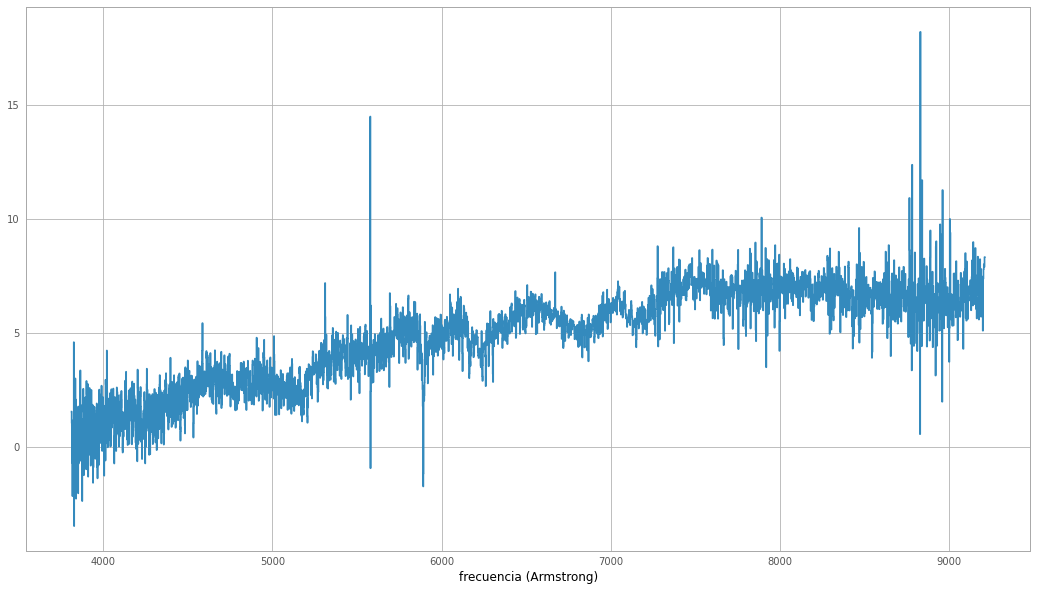

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(X,y,marker='', drawstyle='steps-mid')
plt.xlabel('frecuencia (Armstrong)')
#plt.ylim(-5,10)

## Ficheros csv con los datos de los espectros.

Como se ha comentado junto con los enlaces a los espectros también hemos descargo un csv con información de los mismos. 

Tenemos 5 ficheros. 
* optical_search_west_1.csv
* optical_search_west_2.csv
* optical_search_west_3.csv
* optical_search_west_4.csv
* optical_search_west_5.csv



Cargamos el primero para inspeccionar los datos que contiene.

In [ ]:
df_info_espectros = pd.read_csv("../Espectros/cata_west/optical_search_west_1.csv",index_col=None, encoding='utf-8')
df_info_espectros

,#plate,mjd,fiberid,run2d,specobj_id,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass
0,395,51783,418,'26','444845392081741824','00:57:41.55','+00:31:25.50',17.12,0.000021,0.000012,0,'STAR','M2'
1,395,51783,536,'26','444877827674761216','01:00:10.53','+00:37:39.20',4.48,-0.000019,0.000054,0,'STAR','M3'
2,396,51816,507,'26','445995756675950592','01:05:50.48','+00:31:49.28',3.95,-0.000105,0.000032,0,'STAR','M4'
3,396,51816,581,'26','446016097641064448','01:06:43.06','+00:26:51.57',1.89,-0.000220,0.000024,0,'STAR','M5'
4,397,51794,353,'26','447079325016025088','01:07:57.20','+00:28:33.53',4.50,-0.000204,0.000048,0,'STAR','K7'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2930,54589,135,'26','3298923912556996608','13:49:26.90','+17:35:24.51',18.38,0.000059,0.000012,0,'STAR','M1'
996,2930,54589,244,'26','3298953874248853504','13:46:41.59','+17:43:57.49',24.45,0.000030,0.000011,0,'STAR','M3'
997,2930,54589,283,'26','3298964594487224320','13:44:29.44','+17:41:50.61',24.95,-0.000011,0.000012,0,'STAR','M2'
998,2930,54589,284,'26','3298964869365131264','13:45:08.89','+17:49:11.25',36.84,-0.000007,0.000010,0,'STAR','M1'


In [ ]:
df_info_espectros.columns

Index(['#plate', 'mjd', 'fiberid', 'run2d', 'specobj_id', 'ra', 'dec',
       'sn_median_r', 'z', 'zerr', 'zwarning', 'class', 'subclass'],
      dtype='object')

En principio la información que nos puede interesar es:
'plate', 'mjd', 'fiberid', 'specobj_id', 'ra', 'dec',  'z', 'zerr', 'zwarning',  'class', 'subclass'

# Creación de los dataset.

Teníamos 4 HDU:

* 0 PrimaryHDU  
* 1 COADD  
* 2  SPECOBJ        
* 3  SPZLINE  

Del primer HDU no usaremos ningún dato.

De COADD nos interesa ['flux',	'loglam'], el flujo y el logarimo de la frecuencia. 

De SPECOBJ cargaremos 'PLATEQUALITY', 'SPECOBJID', la calidad de la placa y el identificador del espectro. PLATE, MJD, FIBER, CLASS, SUBCLASS y Z. ['PLATE','MJD','FIBERID'] lo usaremos como clave principal


In [ ]:
def carga_espectro(hdul_):
  '''
  INPUT : l HDU COADD con el espectro.
  ----------------
  OUTPUT : dos vectores. El primero con los flujos. El segundo con  frecuencia en Amrsmtrons redondeada a un decimal
  '''
  datos=hdul_.data
  df_espectro =pd.DataFrame(columns=datos.dtype.names)
  for i in datos:
    data_temp = np.asarray(list(i))
    df_temp = pd.DataFrame(data=data_temp.reshape(1,-1), columns=datos.dtype.names)
    df_espectro =pd.concat([df_espectro, df_temp], ignore_index=True)

  return np.asarray(df_espectro['flux']), np.around(10**np.asarray(df_espectro['loglam']),1)



In [ ]:
def datos_objeto(hdul_, atr_num, atr_float, atr_obj):

  '''
  INPUT : la HDU SPECOBJ 
          Dos listas:
               atr_num con la lista de los atributos numéricos a recuperar
               atr_obj con la lista de los atributos tipo cadena de caracteres

  ----------------
  OUTPUT : una lista con los siguientes datos PLATE, MJD, FIBER, PLATEQUALITY, 'SPECOBJID', 'FLUXOBJID',
                                             'BESTOBJID', 'TARGETOBJID'CLASS, SUBCLASS y Z. 
  '''
  list_datos=[]
  datos = hdul_.data
  for atr in atr_num:
    list_datos.append(int('0'+str(datos[atr][0]).strip())) #como hay algunos ficheros con datos no correctos, 
    #tenemos que pasar el entero a string y quitar espacios. El cero a la izquierda es para que no de error si faltan valores
    #list_datos.append(datos[atr])
  for atr in atr_float:
    list_datos.append(float(datos[atr]))
  for atr in atr_obj:
    list_datos.append(str(datos[atr][0]).strip())
  return list_datos





## Dataset con los espectros de las enanas marrones

Cargamos los nombres de los ficheros que contienen los espectros.

In [ ]:
#ficheros= os.walk('../Espectros/cata_west/espectros/')
ficheros = os.walk("D:/Masteres/Master Big Data/TFM/Trabajo/Datos/espectros_enanas_marrones_2/")
# /content/drive/MyDrive/Astrofisica/Espectros/cata_west

In [ ]:
nombre_directorio, dirs, ficheros = next(ficheros)

In [ ]:
nombre_directorio

'D:/Masteres/Master Big Data/TFM/Trabajo/Datos/espectros_enanas_marrones_2/'

Creamos la lista para los fit.

In [ ]:
fich_fit = [x for x in ficheros if os.path.splitext(x)[1]=='.fits']

Nos aseguramos de que empiecen por 'spec'

In [ ]:
espc_fit =  [x for x in fich_fit if x[:4]=='spec']
len(espc_fit)

4977

In [ ]:
espc_fit

['spec-0299-51671-0244.fits',
 'spec-0300-51666-0210.fits',
 'spec-0303-51615-0048.fits',
 'spec-0305-51613-0274.fits',
 'spec-0305-51613-0303.fits',
 'spec-0305-51613-0304.fits',
 'spec-0305-51613-0310.fits',
 'spec-0306-51690-0139.fits',
 'spec-0341-51690-0037.fits',
 'spec-0371-52078-0094.fits',
 'spec-0371-52078-0146.fits',
 'spec-0371-52078-0191.fits',
 'spec-0371-52078-0275.fits',
 'spec-0371-52078-0294.fits',
 'spec-0371-52078-0390.fits',
 'spec-0371-52078-0517.fits',
 'spec-0371-52078-0597.fits',
 'spec-0372-52173-0108.fits',
 'spec-0372-52173-0138.fits',
 'spec-0372-52173-0142.fits',
 'spec-0372-52173-0221.fits',
 'spec-0372-52173-0236.fits',
 'spec-0372-52173-0248.fits',
 'spec-0372-52173-0499.fits',
 'spec-0373-51788-0107.fits',
 'spec-0373-51788-0154.fits',
 'spec-0373-51788-0156.fits',
 'spec-0373-51788-0187.fits',
 'spec-0373-51788-0219.fits',
 'spec-0373-51788-0255.fits',
 'spec-0373-51788-0309.fits',
 'spec-0374-51791-0147.fits',
 'spec-0374-51791-0260.fits',
 'spec-037

### Creación dataset con los espectros.

Definimos la estructura del dataset donde guardamos los espectros

In [ ]:
#creamos dos listas, una con los atributos numéricos a recuperar de SPECOBJ y otra con los tipo string
atributos_enteros =['PLATE', 'MJD', 'FIBERID', 'SPECOBJID', 'FLUXOBJID', 'BESTOBJID', 'TARGETOBJID']
atributos_float =['Z','Z_ERR']
atributos_obj = ['PLATEQUALITY',  'CLASS', 'SUBCLASS']
columnas = ['nom_fichero_fit','flujo','long_A']+atributos_enteros+atributos_float+atributos_obj
df_obj_espectros_EM = pd.DataFrame(columns= columnas)
df_obj_espectros_EM

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,FLUXOBJID,BESTOBJID,TARGETOBJID,Z,Z_ERR,PLATEQUALITY,CLASS,SUBCLASS


In [ ]:
!pip install pyprind

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


En el código siguiente creamos el dataset con la información que nos interesa.

In [ ]:
import pyprind
pbar = pyprind.ProgBar(len(espc_fit))
for fichero_fit in espc_fit:
  with fits.open(nombre_directorio+fichero_fit) as hdul:
    flujo, long_onda = carga_espectro(hdul['COADD'])
    l=hdul['SPECOBJ'].data #para obtener información de los errores.
    info_obj = datos_objeto(hdul['SPECOBJ'], atributos_enteros, atributos_float, atributos_obj)
 
  df_temp_espectros = pd.DataFrame(columns= columnas)
  df_temp_espectros.nom_fichero_fit = [fichero_fit]
  df_temp_espectros['flujo'] =[flujo]
  df_temp_espectros['long_A'] = [long_onda] #en realidad es la longitud de onda
  df_temp_espectros[atributos_enteros+atributos_float+atributos_obj]=info_obj 
  df_obj_espectros_EM = pd.concat([df_obj_espectros_EM,df_temp_espectros], ignore_index=True)
  pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 05:50:22


In [ ]:
info_obj

[2955,
 54562,
 545,
 3327184109716924416,
 1237655469675971696,
 1237655469675971696,
 11268996147642915,
 -0.0001431504642823711,
 2.8525053494377062e-05,
 'good',
 'STAR',
 'M7']

In [ ]:
df_info= pd.DataFrame(data=np.asarray(list(l),dtype=object).reshape(1,-1), columns=info.dtype.names)


NameError: name 'info' is not defined

In [ ]:
df_obj_espectros_EM.tail(1)

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,FLUXOBJID,BESTOBJID,TARGETOBJID,Z,Z_ERR,PLATEQUALITY,CLASS,SUBCLASS
4976,spec-2955-54562-0545.fits,"[-0.8004633784294128, -0.042661309242248535, 0...","[3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....",2955,54562,545,3327184109716924416,1237655469675971696,1237655469675971696,11268996147642915,-0.00014315,2.85251e-05,good,STAR,M7


### Guardado/carga de los espectros

Lo guardamos el dataset en formato json. (No es posible en csv)
Según el nombre_directorio se puede descargar en local o en google drive

In [ ]:
#nombre_directorio = '../Espectros/datos_json/'
nombre_directorio ='D:/Masteres/Master Big Data/TFM/Trabajo/Datos/espectros_enanas_marrones_2/'
df_obj_espectros_EM.to_json(nombre_directorio+'datos_obj_espectros_EM_cat_West_2.json')

Comprobamos que se lee correctamente.

In [ ]:
df_obj_espectros_fichero_test = pd.read_json(nombre_directorio+'datos_obj_espectros_EM_cat_West_2.json')


In [ ]:
df_obj_espectros_fichero_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4977 entries, 0 to 4976
Data columns (total 15 columns):
nom_fichero_fit    4977 non-null object
flujo              4977 non-null object
long_A             4977 non-null object
PLATE              4977 non-null int64
MJD                4977 non-null int64
FIBERID            4977 non-null int64
SPECOBJID          4977 non-null int64
FLUXOBJID          4977 non-null int64
BESTOBJID          4977 non-null int64
TARGETOBJID        4977 non-null int64
Z                  4977 non-null float64
Z_ERR              4977 non-null float64
PLATEQUALITY       4977 non-null object
CLASS              4977 non-null object
SUBCLASS           4977 non-null object
dtypes: float64(2), int64(7), object(6)
memory usage: 622.1+ KB


Inspeccionamos las longitudes de onda. Observamos que son distintas. Eso es un problema ya que interesaría que fueran todas iguales. 

In [ ]:

df_obj_espectros_fichero_test['flujo'].head(10)

0    [4.3910250664, 2.0900139809, 1.417214989700000...
1    [1.563041091, 1.6712306738, 1.77942276, -0.006...
2    [9.9177570343, 5.7898278236, 1.619659662200000...
3    [1.6518043279999999, 6.2909665108, 4.853723526...
4    [1.0488002299999999, -0.7569850683, 1.49734604...
5    [5.0008974075, 0.8941483498, 0.9834271669, 2.3...
6    [0.5787697434, 3.8180923462000003, 6.324136734...
7    [-2.4238922596, 0.6041083336, 3.6311182976, 6....
8    [0.8206269145, 0.6314460635, -0.1979617923, -0...
9    [0.9069677591, -0.06421201680000001, 0.1117516...
Name: flujo, dtype: object

## Dataset con los datos de las enanas marrones

In [ ]:
dir= '../Espectros/cata_west/'
fichero = 'optical_search_west_'

In [ ]:
dir= '../Espectros/cata_west/'
fichero = 'optical_search_west_'

df_datos_enanas_marrones = pd.DataFrame()
for i in range(1,6):
  print(i)
  temp = pd.read_csv(dir+fichero+str(i)+'.csv',index_col=None, encoding='utf-8')
  df_datos_enanas_marrones = pd.concat([df_datos_enanas_marrones,temp], ignore_index=True)

1
2
3
4
5


In [ ]:
df_datos_enanas_marrones

,#plate,mjd,fiberid,run2d,specobj_id,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass
0,395,51783,418,'26','444845392081741824','00:57:41.55','+00:31:25.50',17.12,0.000021,0.000012,0,'STAR','M2'
1,395,51783,536,'26','444877827674761216','01:00:10.53','+00:37:39.20',4.48,-0.000019,0.000054,0,'STAR','M3'
2,396,51816,507,'26','445995756675950592','01:05:50.48','+00:31:49.28',3.95,-0.000105,0.000032,0,'STAR','M4'
3,396,51816,581,'26','446016097641064448','01:06:43.06','+00:26:51.57',1.89,-0.000220,0.000024,0,'STAR','M5'
4,397,51794,353,'26','447079325016025088','01:07:57.20','+00:28:33.53',4.50,-0.000204,0.000048,0,'STAR','K7'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2974,54592,54,'26','3348441243397941248','17:24:12.37','+30:59:17.40',5.76,-0.000085,0.000040,0,'STAR','M1'
4996,2974,54592,71,'26','3348445916322359296','17:25:18.64','+30:14:11.91',14.46,-0.000197,0.000013,0,'STAR','K7'
4997,2974,54592,149,'26','3348467356799100928','17:22:39.51','+30:30:38.38',3.74,-0.000048,0.000029,0,'STAR','M4'
4998,2974,54592,392,'26','3348534152130488320','17:18:24.95','+32:14:31.07',1.60,-0.000037,0.000019,0,'STAR','M7'


## Guardar/recuperar fichero

In [ ]:
directorio = "./cata_west/"
fichero = 'datos_muestra_5000_catalogo_west.csv'
df_datos_enanas_marrones.to_csv(directorio+fichero, index=False, encoding= 'utf-8')

Recuperamos los datos

In [ ]:
directorio = "./cata_west/"
fichero = 'datos_muestra_5000_catalogo_west.csv'
df_datos_enanas_marrones = pd.read_csv(directorio+fichero, index_col= False, encoding='utf-8')
df_datos_enanas_marrones

#Final